## WeRateDogs Twitter data - Analysis and Visualisations

I have gathered, assessed and cleaned the tweet archive data of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with humorous comments about the dog. 

I have wrangled this data to see if I can gather any interesting insights from the twitter data of WeRateDogs.

To help carry out my analysis I used the Python library Seaborn to help produce my data visualisations.

In [219]:
import seaborn as sns

### Analysis 1 - Favorite Count vs Rating
The first analysis I carried out was to determine if there was a trend between the rating of the dog and the number of tiimes the tweet was favorited.
Keep in mind that each of these ratings were a score out of 10, and yes, at times these dogs have been givena rating greater than 10.

<AxesSubplot:xlabel='rating_numerator', ylabel='favorite_count'>

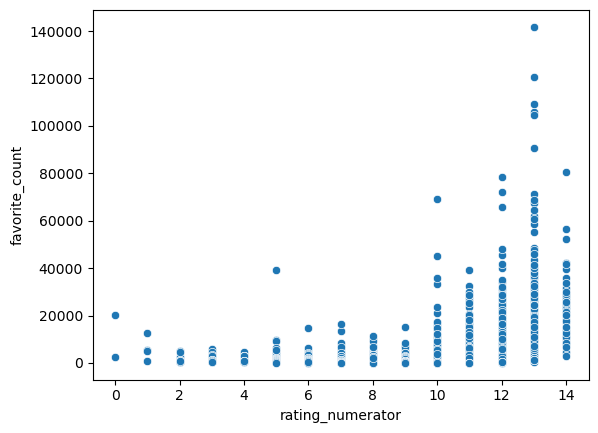

In [221]:
sns.scatterplot(data=df_master,x="rating_numerator",y="favorite_count")

I plot the favourite count against the rating number to see if there would be a correlation. As expected there does appear to be a trend. As the rating increases so does the number of favourites. This suggests that the higher the rating of the dog, the more favorites the tweet will likely get.
Next I'll plot the retweet count against the rating to see if there is a similiar trend.

### Analysis 2 - Retweets vs Rating

<AxesSubplot:xlabel='rating_numerator', ylabel='retweet_count'>

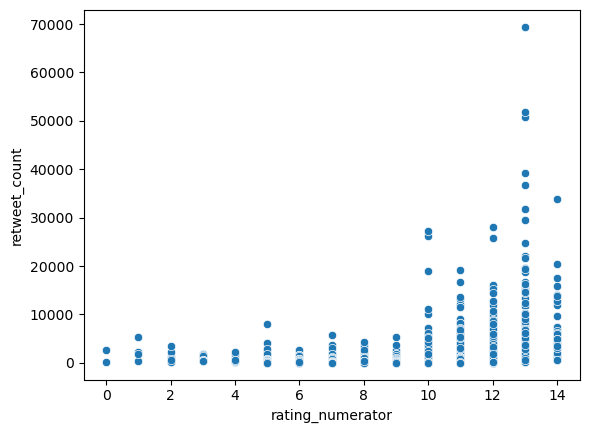

In [223]:
sns.scatterplot(data=df_master,x="rating_numerator",y="retweet_count")

Likewise to favorites vs rating, there does appear to be a positive correlation, suggesting that the higher the rating the more retweets the tweet will likely get.

### Analysis 3 - Retweets vs Favorites
I have a strong suspician that there will be a posistve correlation between the number of retweets and number of favorites, so I plot the data, to see if this is indeed the case.

<AxesSubplot:xlabel='favorite_count', ylabel='retweet_count'>

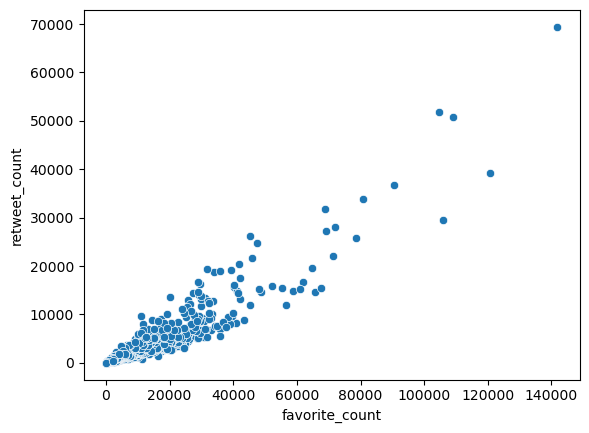

In [224]:
sns.scatterplot(data=df_master,x="favorite_count",y="retweet_count")

As expected, there does appear to be a strong correlation between the number of retweets and the number of favorites.

### Analysis 4 - Most favorited Dog stage
I'm quite curious to see if there is any particular dog stage which gets more favorites than others.
So first, I will group the data by the dog stage, and then calculate the mean favorite count.
I will then plot this data against a bar plot to see the results.


In [49]:
df_dog_stage_fav_count = df_master.groupby("dog_stage")["favorite_count"].mean().reset_index().rename(columns={"favorite_count": "avg_favorite_count"})

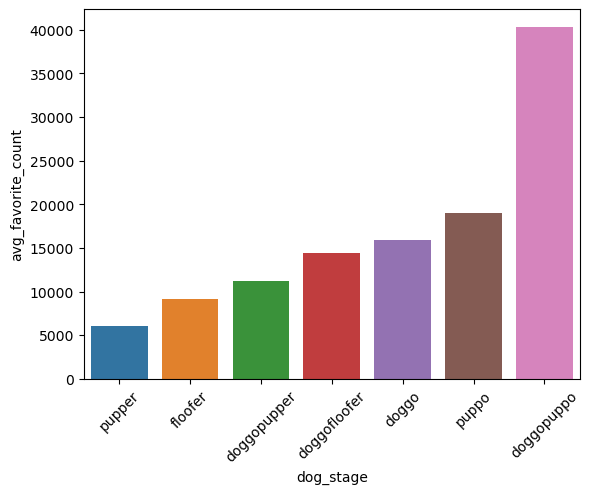

In [53]:
fav = sns.barplot(data=df_dog_stage_fav_count.sort_values('avg_favorite_count'), x="dog_stage",y="avg_favorite_count")
for item in fav.get_xticklabels():
    item.set_rotation(45)

In [35]:
df_master['dog_stage'].value_counts().to_frame()

,dog_stage
pupper,221
doggo,72
puppo,23
doggopupper,10
floofer,9
doggopuppo,1
doggofloofer,1


From the barplots it seems as though doggopuppo is the most favorited dog type. However, it is important to note that there was only 1 dog identified as a doggopuppo and so this may not be a good representation of the data, due to the small sample size for this dog type.
Looking at the data the dog type pupper appears to be the least favorited dog type, whilst puppo seems to be the most favorited. 

### Analysis 5 - Most Popular Dog Names 
To determine the most popular dog names from this dataset I will groupby the name, then count the number of tweetIDs per name

In [62]:
df_master.groupby("name")["tweet_id"].count().to_frame().rename(columns={"tweet_id": "count"}).sort_values('count', ascending=False)

,count
name,
Charlie,11
Lucy,11
Cooper,10
Oliver,10
Penny,9
...,...
Keet,1
Canela,1
Kellogg,1


We can see that Charlie and Lucy are the most popular dog names, followed by Cooper and Oliver